In [ ]:
import math
import numpy as np
import re
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt

## Authorize Google Drive access

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


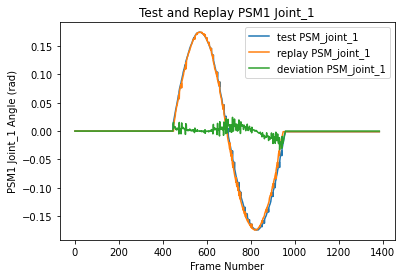

In [ ]:
# Get an array with data of the test and replay files
PATH_test = "/content/drive/MyDrive/Test Script 1/dvrk_kinematic_logger_test.xlsx"
PATH_replay = "/content/drive/MyDrive/Test Script 1/dvrk_kinematic_logger_replay.xlsx"

data_test = pd.read_excel(PATH_test)
data_replay = pd.read_excel(PATH_replay)

data_test_array = pd.DataFrame(data_test).to_numpy()
data_replay_array = pd.DataFrame(data_replay).to_numpy()

#Find the shift in the frame number of the test and replay arrays
frame_max_test =  data_test_array[np.argmax(data_test_array[:,2], axis=0),1]
frame_max_replay =  data_replay_array[np.argmax(data_replay_array[:,2], axis=0),1]
frame_shift = frame_max_replay - frame_max_test
#Shift the replay values by the frame shift
data_replay_array[:,1] = data_replay_array[:,1] - frame_shift

replay_starting_index = np.where(data_replay_array[:,1] == data_test_array[0, 1])[0][0]
replay_end_index = np.where(data_replay_array[:,1] == data_test_array[-1, 1])[0][0]

data_replay_array = data_replay_array[replay_starting_index:replay_end_index+1,:]
# data_deviation = data_test_array
# data_deviation[:,2:-2] = data_test_array[:,2:-2] - data_replay_array[:,2:-2]

plt.plot(data_test_array[:,1], data_test_array[:,2], label = "test PSM_joint_1")
plt.plot(data_replay_array[:,1], data_replay_array[:,2], label = "replay PSM_joint_1")
data_deviation = data_test_array
data_deviation[:,2:-2] = data_test_array[:,2:-2] - data_replay_array[:,2:-2]
plt.plot(data_deviation[:,1], data_deviation[:,2], label = "deviation PSM_joint_1")
# naming the x axis
plt.xlabel('Frame Number')

# naming the y axis
plt.ylabel('PSM1 Joint_1 Angle (rad)')

# giving a title to my graph
plt.title('Test and Replay PSM1 Joint_1')

plt.legend()

0.00635173916291717


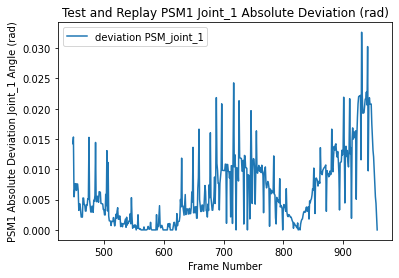

In [ ]:

plt.plot(data_deviation[447:957,1], np.absolute(data_deviation[447:957,2]), label = "deviation PSM_joint_1")
# naming the x axis
plt.xlabel('Frame Number')

# naming the y axis
plt.ylabel('PSM1 Absolute Deviation Joint_1 Angle (rad)')

# giving a title to my graph
plt.title('Test and Replay PSM1 Joint_1 Absolute Deviation (rad)')

plt.legend()
mean_deviation = np.mean(np.absolute(data_deviation[447:957,2]))
print(mean_deviation)

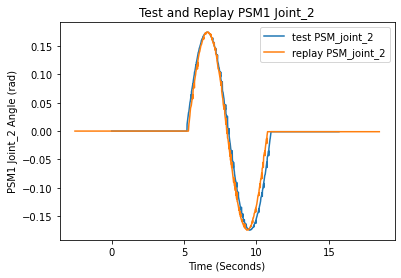

In [ ]:
# You will need to update this path to match the folder in your Google Drive
PATH = "/content/drive/MyDrive/Test Script 1/dvrk_kinematic_logger_test.xls"
data = pd.read_excel(PATH)
psm1_j1_j2 = pd.DataFrame(data, columns = ['Time (Seconds)','PSM1_joint_1', 'PSM1_joint_2'])
data_test_array = psm1_j1_j2.to_numpy()

max_index = np.argmax(data_test_array[:,1], axis=0)
time_shift_1 =  data_test_array[max_index,0]

plt.plot(data_test_array[:,0], data_test_array[:,1], label = "test PSM1_joint_2")

PATH = "/content/drive/MyDrive/Test Script 1/dvrk_kinematic_logger_replay.xlsx"
data = pd.read_excel(PATH)

psm1_j1_j2 = pd.DataFrame(data, columns = ['Time (Seconds)','PSM1_joint_1', 'PSM1_joint_2'])

data_replay_array = psm1_j1_j2.to_numpy()

max_index = np.argmax(data_replay_array[:,2], axis=0)
time_shift_2 =  data_replay_array[max_index,0]

time_shift = time_shift_2 - time_shift_1

plt.plot(data_replay_array[:,0] - time_shift, data_replay_array[:,2], label = "replay PSM1_joint_2")

# naming the x axis
plt.xlabel('Time (Seconds)')

# naming the y axis
plt.ylabel('PSM1 Joint_2 Angle (rad)')

# giving a title to my graph
plt.title('Test and Replay PSM1 Joint_2')

plt.legend()

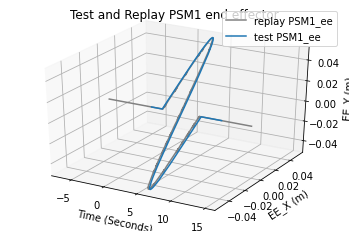

In [ ]:
PATH = "/content/drive/MyDrive/Test Script 2/dvrk_kinematic_logger_test_2.xls"
data = pd.read_excel(PATH)
psm1_x_y = pd.DataFrame(data, columns = ['Time (Seconds)','PSM1_ee_x', 'PSM1_ee_y'])
data_test_array = psm1_x_y.to_numpy()

max_index = np.argmax(data_test_array[:,1], axis=0)
time_shift_1 =  data_test_array[max_index,0]

PATH = "/content/drive/MyDrive/Test Script 2/dvrk_kinematic_logger_replay_2.xls"
data = pd.read_excel(PATH)

psm1_x_y = pd.DataFrame(data, columns = ['Time (Seconds)','PSM1_ee_x', 'PSM1_ee_y'])

data_replay_array = psm1_x_y.to_numpy()

max_index = np.argmax(data_replay_array[:,2], axis=0)
time_shift_2 =  data_replay_array[max_index,0]

time_shift = time_shift_2 - time_shift_1

ax = plt.axes(projection='3d')
ax.plot3D(data_replay_array[:,0]- time_shift, data_replay_array[:,1], data_replay_array[:,2], 'gray', label = "replay PSM1_ee")
ax.plot3D(data_test_array[:,0], data_test_array[:,1], data_test_array[:,2], label = "test PSM1_ee")

ax.set_xlabel('Time (Seconds)')
ax.set_ylabel('EE_X (m)')
ax.set_zlabel('EE_Y (m)')
# giving a title to my graph
plt.title('Test and Replay PSM1 end effector')

plt.legend()

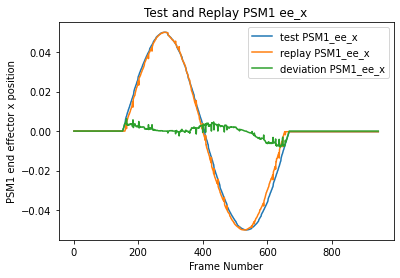

In [ ]:
PATH_testxy = "/content/drive/MyDrive/Test Script 2/dvrk_kinematic_logger_test_2.xls"
PATH_replayxy = "/content/drive/MyDrive/Test Script 2/dvrk_kinematic_logger_replay_2.xls"
data_testxy = pd.read_excel(PATH_testxy)
data_replayxy = pd.read_excel(PATH_replayxy)
data_test_array = pd.DataFrame(data_testxy).to_numpy()
data_replay_array = pd.DataFrame(data_replayxy).to_numpy()

#Find the shift in the frame number of the test and replay arrays
frame_max_test =  data_test_array[np.argmax(data_test_array[:,2], axis=0),1]
frame_max_replay =  data_replay_array[np.argmax(data_replay_array[:,2], axis=0),1]
frame_shift = frame_max_replay - frame_max_test
#Shift the replay values by the frame shift
data_replay_array[:,1] = data_replay_array[:,1] - frame_shift

replay_starting_index = np.where(data_replay_array[:,1] == data_test_array[0, 1])[0][0]
replay_end_index = np.where(data_replay_array[:,1] == data_test_array[-1, 1])[0][0]

data_replay_array = data_replay_array[replay_starting_index:replay_end_index+1,:]
plt.plot(data_test_array[:,1], data_test_array[:,9], label = "test PSM1_ee_x")
plt.plot(data_replay_array[:,1], data_replay_array[:,9], label = "replay PSM1_ee_x")
data_deviation = data_test_array
data_deviation[:,2:-2] = data_test_array[:,2:-2] - data_replay_array[:,2:-2]
plt.plot(data_deviation[:,1], data_deviation[:,9], label = "deviation PSM1_ee_x")
# naming the x axis
plt.xlabel('Frame Number')

# naming the y axis
plt.ylabel('PSM1 end effector x position')

# giving a title to my graph
plt.title('Test and Replay PSM1 ee_x')

plt.legend()

0.0014372248889594748


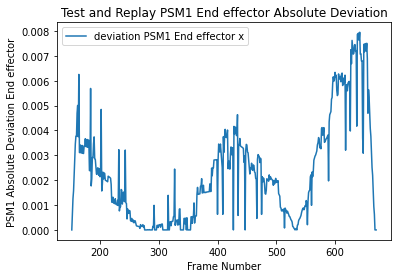

In [ ]:
plt.plot(data_deviation[151:670,1], np.absolute(data_deviation[151:670,9]), label = "deviation PSM1 End effector x")
# naming the x axis
plt.xlabel('Frame Number')

# naming the y axis
plt.ylabel('PSM1 Absolute Deviation End effector')

# giving a title to my graph
plt.title('Test and Replay PSM1 End effector Absolute Deviation')

plt.legend()
mean_deviation = np.mean(np.absolute(data_deviation[447:957,9]))
print(mean_deviation)

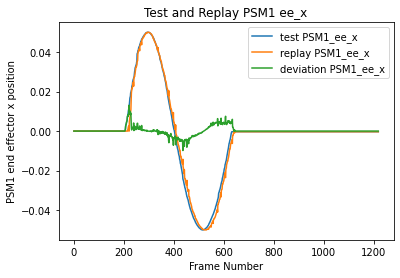

In [ ]:
PATH_testxy = "/content/drive/MyDrive/Test two arm/dvrk_kinematic_logger_two_arm.xls"
PATH_replayxy = "/content/drive/MyDrive/Test two arm/dvrk_kinematic_logger_two_arm_replay.xls"
data_testxy = pd.read_excel(PATH_testxy)
data_replayxy = pd.read_excel(PATH_replayxy)
data_test_array = pd.DataFrame(data_testxy).to_numpy()
data_replay_array = pd.DataFrame(data_replayxy).to_numpy()

#Find the shift in the frame number of the test and replay arrays
frame_max_test =  data_test_array[np.argmax(data_test_array[:,9], axis=0),1]
frame_max_replay =  data_replay_array[np.argmax(data_replay_array[:,9], axis=0),1]
frame_shift = frame_max_replay - frame_max_test
#Shift the replay values by the frame shift
data_replay_array[:,1] = data_replay_array[:,1] - frame_shift

replay_starting_index = np.where(data_replay_array[:,1] == data_test_array[0, 1])[0][0]
replay_end_index = np.where(data_replay_array[:,1] == data_test_array[-1, 1])[0][0]

data_replay_array = data_replay_array[replay_starting_index:replay_end_index+1,:]
plt.plot(data_test_array[:,1], data_test_array[:,9], label = "test PSM1_ee_x")
plt.plot(data_replay_array[:,1], data_replay_array[:,9], label = "replay PSM1_ee_x")
data_deviation = data_test_array 
data_deviation[:,2:-2] = data_test_array[:,2:-2] - data_replay_array[:,2:-2]
plt.plot(data_deviation[:,1], data_deviation[:,9], label = "deviation PSM1_ee_x")
# naming the x axis
plt.xlabel('Frame Number')

# naming the y axis
plt.ylabel('PSM1 end effector x position')

# giving a title to my graph
plt.title('Test and Replay PSM1 ee_x')

plt.legend()

0.002636405755837745


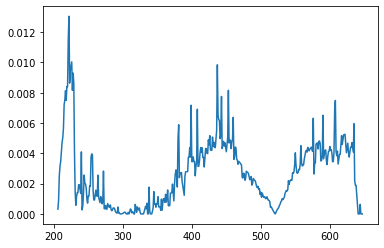

In [ ]:
plt.plot(data_deviation[205:647,1], np.absolute(data_deviation[205:647,9]), label = "deviation PSM_joint_1")

mean_deviation = np.mean(np.absolute(data_deviation[205:647,9]))
print(mean_deviation)

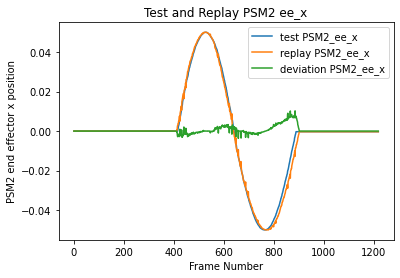

In [ ]:
PATH_testxy = "/content/drive/MyDrive/Test two arm/dvrk_kinematic_logger_two_arm.xls"
PATH_replayxy = "/content/drive/MyDrive/Test two arm/dvrk_kinematic_logger_two_arm_replay.xls"
data_testxy = pd.read_excel(PATH_testxy)
data_replayxy = pd.read_excel(PATH_replayxy)
data_test_array = pd.DataFrame(data_testxy).to_numpy()
data_replay_array = pd.DataFrame(data_replayxy).to_numpy()

#Find the shift in the frame number of the test and replay arrays
frame_max_test =  data_test_array[np.argmax(data_test_array[:,28], axis=0),1]
frame_max_replay =  data_replay_array[np.argmax(data_replay_array[:,28], axis=0),1]
frame_shift = frame_max_replay - frame_max_test
#Shift the replay values by the frame shift
data_replay_array[:,1] = data_replay_array[:,1] - frame_shift

replay_starting_index = np.where(data_replay_array[:,1] == data_test_array[0, 1])[0][0]
replay_end_index = np.where(data_replay_array[:,1] == data_test_array[-1, 1])[0][0]

data_replay_array = data_replay_array[replay_starting_index:replay_end_index+1,:]
plt.plot(data_test_array[:,1], data_test_array[:,28], label = "test PSM2_ee_x")
plt.plot(data_replay_array[:,1], data_replay_array[:,28], label = "replay PSM2_ee_x")
data_deviation = data_test_array
data_deviation[:,2:-2] = data_test_array[:,2:-2] - data_replay_array[:,2:-2]
plt.plot(data_deviation[:,1], data_deviation[:,28], label = "deviation PSM2_ee_x")
# naming the x axis
plt.xlabel('Frame Number')

# naming the y axis
plt.ylabel('PSM2 end effector x position')

# giving a title to my graph
plt.title('Test and Replay PSM2 ee_x')

plt.legend()

0.0019680870933974906


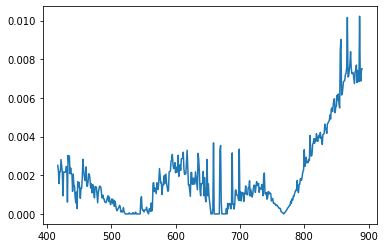

In [ ]:
plt.plot(data_deviation[416:890,1], np.absolute(data_deviation[416:890,28]), label = "deviation PSM_joint_1")
mean_deviation = np.mean(np.absolute(data_deviation[416:890,28]))
print(mean_deviation)

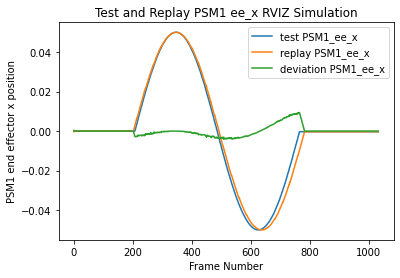

In [ ]:
PATH_testxy = "/content/drive/MyDrive/Test Script 1 Rviz/dvrk_kinematic_logger_rviz_test.xls"
PATH_replayxy = "/content/drive/MyDrive/Test Script 1 Rviz/dvrk_kinematic_logger_rviz_replay.xls"
data_testxy = pd.read_excel(PATH_testxy)
data_replayxy = pd.read_excel(PATH_replayxy)
data_test_array = pd.DataFrame(data_testxy).to_numpy()
data_replay_array = pd.DataFrame(data_replayxy).to_numpy()

#Find the shift in the frame number of the test and replay arrays
frame_max_test =  data_test_array[np.argmax(data_test_array[:,2], axis=0),1]
frame_max_replay =  data_replay_array[np.argmax(data_replay_array[:,2], axis=0),1]
frame_shift = frame_max_replay - frame_max_test
#Shift the replay values by the frame shift
data_replay_array[:,1] = data_replay_array[:,1] - frame_shift

replay_starting_index = np.where(data_replay_array[:,1] == data_test_array[0, 1])[0][0]
replay_end_index = np.where(data_replay_array[:,1] == data_test_array[-1, 1])[0][0]

data_replay_array = data_replay_array[replay_starting_index:replay_end_index+1,:]
plt.plot(data_test_array[:,1], data_test_array[:,9], label = "test PSM1_ee_x")
plt.plot(data_replay_array[:,1], data_replay_array[:,9], label = "replay PSM1_ee_x")
data_deviation = data_test_array
data_deviation[:,2:-2] = data_test_array[:,2:-2] - data_replay_array[:,2:-2]
plt.plot(data_deviation[:,1], data_deviation[:,9], label = "deviation PSM1_ee_x")
# naming the x axis
plt.xlabel('Frame Number')

# naming the y axis
plt.ylabel('PSM1 end effector x position')

# giving a title to my graph
plt.title('Test and Replay PSM1 ee_x RVIZ Simulation')

plt.legend()

0.002525409667305345


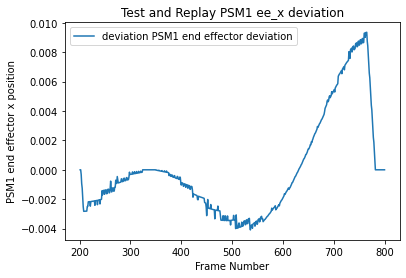

In [ ]:
plt.plot(data_deviation[200:800,1], data_deviation[200:800,9], label = "deviation PSM1 end effector deviation")
# naming the x axis
plt.xlabel('Frame Number')

# naming the y axis
plt.ylabel('PSM1 end effector x position')

# giving a title to my graph
plt.title('Test and Replay PSM1 ee_x deviation')

plt.legend()
mean_deviation = np.mean(np.absolute(data_deviation[200:800,9]))
print(mean_deviation)

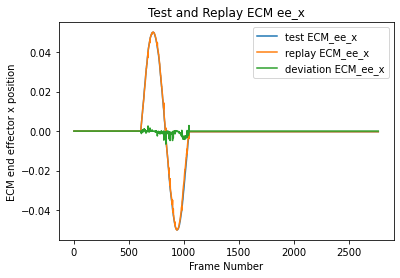

In [ ]:
PATH_testxy = "/content/drive/MyDrive/Test ECM PSM1/dvrk_kinematic_logger_ECM_PSM1.xls"
PATH_replayxy = "/content/drive/MyDrive/Test ECM PSM1 (1)/replayed_data.xlsx"
data_testxy = pd.read_excel(PATH_testxy)
data_replayxy = pd.read_excel(PATH_replayxy)
data_test_array = pd.DataFrame(data_testxy).to_numpy()
data_replay_array = pd.DataFrame(data_replayxy).to_numpy()

#Find the shift in the frame number of the test and replay arrays
frame_max_test =  data_test_array[np.argmax(data_test_array[:,44], axis=0),1]
frame_max_replay =  data_replay_array[np.argmax(data_replay_array[:,44], axis=0),1]
frame_shift = frame_max_replay - frame_max_test
#Shift the replay values by the frame shift
data_replay_array[:,1] = data_replay_array[:,1] - frame_shift

replay_starting_index = np.where(data_replay_array[:,1] == data_test_array[0, 1])[0][0]
replay_end_index = np.where(data_replay_array[:,1] == data_test_array[-1, 1])[0][0]

data_replay_array = data_replay_array[replay_starting_index:replay_end_index+1,:]
plt.plot(data_test_array[:,1], data_test_array[:,44], label = "test ECM_ee_x")
plt.plot(data_replay_array[:,1], data_replay_array[:,44], label = "replay ECM_ee_x")
data_deviation = data_test_array
data_deviation[:,2:-2] = data_test_array[:,2:-2] - data_replay_array[:,2:-2]
plt.plot(data_deviation[:,1], data_deviation[:,44], label = "deviation ECM_ee_x")
# naming the x axis
plt.xlabel('Frame Number')

# naming the y axis
plt.ylabel('ECM end effector x position')

# giving a title to my graph
plt.title('Test and Replay ECM ee_x')

plt.legend()

0.0008775303048849101


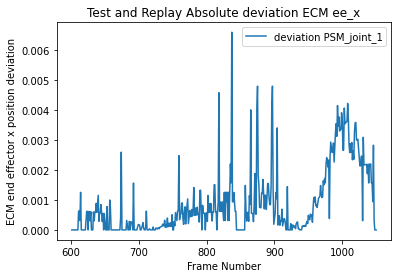

In [ ]:
plt.plot(data_deviation[600:1050,1], np.absolute(data_deviation[600:1050,44]), label = "deviation PSM_joint_1")
# naming the x axis
plt.xlabel('Frame Number')

# naming the y axis
plt.ylabel('ECM end effector x position deviation')

# giving a title to my graph
plt.title('Test and Replay Absolute deviation ECM ee_x')

plt.legend()
mean_deviation = np.mean(np.absolute(data_deviation[600:1050,44]))
print(mean_deviation)

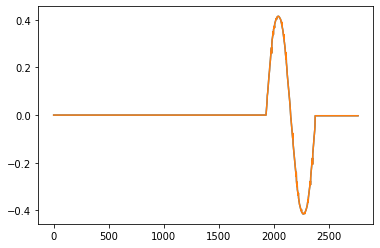

In [ ]:
PATH_testxy = "/content/drive/MyDrive/Test ECM PSM1/dvrk_kinematic_logger_ECM_PSM1.xls"
PATH_replayxy = "/content/drive/MyDrive/Test ECM PSM1 (1)/replayed_data (4).xlsx"
data_testxy = pd.read_excel(PATH_testxy)
data_replayxy = pd.read_excel(PATH_replayxy)
data_test_array = pd.DataFrame(data_testxy).to_numpy()
data_replay_array = pd.DataFrame(data_replayxy).to_numpy()

plt.plot(data_test_array[:,2], label = "test ECM_ee_x")
plt.plot(data_replay_array[:,0], label = "replay ECM_ee_x")


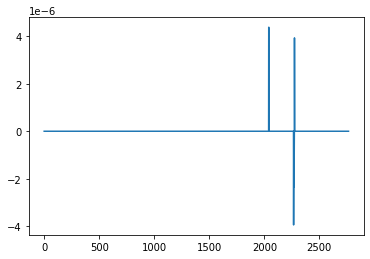

In [ ]:
deviation = data_replay_array - data_test_array[:, 2:8]
plt.plot((deviation[:,1]/data_test_array[:, 1])*100, label = "test ECM_ee_x")

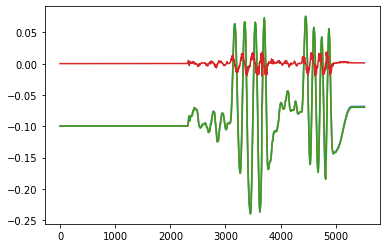

In [ ]:
# Get an array with data of the test and replay files
PATH_test = "/content/drive/MyDrive/Colab Notebooks/dvrk_kinematic_logger_final_test.xlsx"
PATH_replay = "/content/drive/MyDrive/Colab Notebooks/replayed_data_final.xlsx"
PATH_replay_2 = "/content/drive/MyDrive/Colab Notebooks/replayed_data_final_trial_2.xlsx"

data_test = pd.read_excel(PATH_test)
data_replay = pd.read_excel(PATH_replay)
data_replay_2 = pd.read_excel(PATH_replay_2)

data_test_array = pd.DataFrame(data_test).to_numpy()
data_replay_array = pd.DataFrame(data_replay).to_numpy()
data_replay_array_2 = pd.DataFrame(data_replay_2).to_numpy()

plt.plot(data_test_array[:,3], label = "test ECM_ee_x")
plt.plot(data_replay_array[:,0], label = "t ECM_ee_x")
plt.plot(data_replay_array_2[:,0], label = "t1 ECM_ee_x")
# plt.plot(data_test_array[:,3] - data_replay_array[:,0], label = "te ECM_ee_x")
plt.plot(data_test_array[:,3] - data_replay_array_2[:,0], label = "te1 ECM_ee_x")

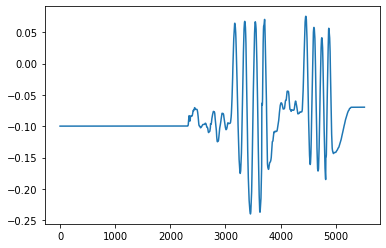